# Thoracic Surgery Data

## Content

 The data taken was used to determine the life expectancy in lung cancer patients: death within one year after surgery or survival.
 
Cardiothoracic surgery (also known as thoracic surgery) is the field of medicine involved in surgical treatment of organs inside the thorax (the chest)—generally treatment of conditions of the heart (heart disease) and lungs (lung disease).

The diagnosis was based on the tumor(s) present in the patient. 

The link to the dataset is: https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data#

## Attributes

Number of Attributes: 17

1. DGN: Diagnosis - specific combination of ICD-10 codes(codes given to specific tumors) for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1) 

2. PRE4: Forced vital capacity - FVC defined as the amount of air that can be forcibly exhaled from the lungs after taking the deepest breath possible; used assess one's ability to tolerate surgery (numeric) 

3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration(pulmonary function test) - FEV1 (numeric) 

4. PRE6: Performance status - Zubrod scale(or ECOG (Eastern Cooperative Oncology Group) scale. This scale ranges from 0 to 4, with 0 being fully functional and 4 being bedridden.) (PRZ2,PRZ1,PRZ0) 

5. PRE7: Pain before surgery (T,F) 

6. PRE8: Haemoptysis(coughing up blood) before surgery (T,F) 

7. PRE9: Dyspnoea(difficult or labored breathing) before surgery (T,F) 

8. PRE10: Cough before surgery (T,F) 

9. PRE11: Weakness before surgery (T,F) 

10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13) 

11. PRE17: Type 2 DM - diabetes mellitus (T,F) 

12. PRE19: MI (abbreviation for myocardial infarction, otherwise known as a heart attack.) up to 6 months (T,F) 

13. PRE25: PAD - peripheral arterial diseases ( circulatory problem in which narrowed arteries reduce blood flow to your limbs) (T,F) 

14. PRE30: Smoking (T,F)

15. PRE32: Asthma (T,F) 

16. AGE: Age at surgery (numeric)

17. Alive: 1 year survival period - (T)rue value if died (T,F) 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import ExtraTreesClassifier
import sys

print("Python version is "+sys.version)
print("Matplotlib version is "+matplotlib.__version__)
print("Scikit-Learn version is "+sklearn.__version__)
print("Numpy version is "+np.__version__)
print("Pandas version is "+pd.__version__)

Python version is 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Matplotlib version is 3.1.3
Scikit-Learn version is 0.22.1
Numpy version is 1.18.1
Pandas version is 1.0.1


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

## Fetching the Data

In [3]:
df = pd.read_csv('thoracic_surgery.csv')
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                470 non-null    object 
 1   FVC                      470 non-null    float64
 2   FEV1                     470 non-null    float64
 3   Zubrod_Scale             470 non-null    object 
 4   Pain_before_Surgery      470 non-null    object 
 5   Haemoptysis              470 non-null    object 
 6   Dyspnoea                 470 non-null    object 
 7   Cough_before_surgery     470 non-null    object 
 8   Weakness_before_surgery  470 non-null    object 
 9   TM_Size                  470 non-null    object 
 10  Type2_DM                 470 non-null    object 
 11  MI                       470 non-null    object 
 12  PAD                      470 non-null    object 
 13  Smoking                  470 non-null    object 
 14  Asthma                   4

## Clean and PreProcess Data

In [4]:
df = df.dropna()
print(df.head(5))

  Diagnosis   FVC  FEV1 Zubrod_Scale Pain_before_Surgery Haemoptysis Dyspnoea  \
0      DGN2  2.88  2.16         PRZ1                   F           F        F   
1      DGN3  3.40  1.88         PRZ0                   F           F        F   
2      DGN3  2.76  2.08         PRZ1                   F           F        F   
3      DGN3  3.68  3.04         PRZ0                   F           F        F   
4      DGN3  2.44  0.96         PRZ2                   F           T        F   

  Cough_before_surgery Weakness_before_surgery TM_Size Type2_DM MI PAD  \
0                    T                       T    OC14        F  F   F   
1                    F                       F    OC12        F  F   F   
2                    T                       F    OC11        F  F   F   
3                    F                       F    OC11        F  F   F   
4                    T                       T    OC11        F  F   F   

  Smoking Asthma  Age Alive  
0       T      F   60     F  
1       

In [5]:
aliveIndex = pd.Categorical(df.Alive).categories       
print(aliveIndex)  #get the categories
df.Alive = pd.Categorical(df.Alive).codes  #convert from category names to category code.

diagnosisIndex = pd.Categorical(df.Diagnosis).categories
print(diagnosisIndex)
#df.Diagnosis = df.Diagnosis = pd.Categorical(df.Diagnosis).codes  

Zubrod_ScaleIndex = pd.Categorical(df.Zubrod_Scale).categories
print(Zubrod_ScaleIndex)
#df.Zubrod_Scale = df.Zubrod_Scale = pd.Categorical(df.Zubrod_Scale).codes 

Pain_before_SurgeryIndex = pd.Categorical(df.Pain_before_Surgery).categories
print(Pain_before_SurgeryIndex)
df.Pain_before_Surgery = df.Pain_before_Surgery = pd.Categorical(df.Pain_before_Surgery).codes 

HaemoptysisIndex = pd.Categorical(df.Haemoptysis).categories
print(HaemoptysisIndex)
df.Haemoptysis = df.Haemoptysis = pd.Categorical(df.Haemoptysis).codes 

DyspnoeaIndex = pd.Categorical(df.Dyspnoea).categories
print(DyspnoeaIndex)
df.Dyspnoea = df.Dyspnoea = pd.Categorical(df.Dyspnoea).codes 

Cough_before_surgeryIndex = pd.Categorical(df.Cough_before_surgery).categories
print(Cough_before_surgeryIndex)
df.Cough_before_surgery = df.Cough_before_surgery = pd.Categorical(df.Cough_before_surgery).codes 

Weakness_before_surgeryIndex = pd.Categorical(df.Weakness_before_surgery).categories
print(Weakness_before_surgeryIndex)
df.Weakness_before_surgery = df.Weakness_before_surgery = pd.Categorical(df.Weakness_before_surgery).codes 

TM_SizeIndex = pd.Categorical(df.TM_Size).categories
print(TM_SizeIndex)
#df.TM_Size = df.TM_Size = pd.Categorical(df.TM_Size).codes 

Type2_DMIndex = pd.Categorical(df.Type2_DM).categories
print(Type2_DMIndex)
df.Type2_DM = df.Type2_DM = pd.Categorical(df.Type2_DM).codes

MIIndex = pd.Categorical(df.MI).categories
print(MIIndex)
df.MI = df.MI = pd.Categorical(df.MI).codes

PADIndex = pd.Categorical(df.PAD).categories
print(PADIndex)
df.PAD = df.PAD = pd.Categorical(df.PAD).codes

SmokingIndex = pd.Categorical(df.Smoking).categories
print(SmokingIndex)
df.Smoking = df.Smoking = pd.Categorical(df.Smoking).codes

AsthmaIndex = pd.Categorical(df.Asthma).categories
print(AsthmaIndex)
df.Asthma = df.Asthma = pd.Categorical(df.Asthma).codes

df.head(10)

Index(['F', 'T'], dtype='object')
Index(['DGN1', 'DGN2', 'DGN3', 'DGN4', 'DGN5', 'DGN6', 'DGN8'], dtype='object')
Index(['PRZ0', 'PRZ1', 'PRZ2'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['OC11', 'OC12', 'OC13', 'OC14'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['F', 'T'], dtype='object')
Index(['F', 'T'], dtype='object')


,Diagnosis,FVC,FEV1,Zubrod_Scale,Pain_before_Surgery,Haemoptysis,Dyspnoea,Cough_before_surgery,Weakness_before_surgery,TM_Size,Type2_DM,MI,PAD,Smoking,Asthma,Age,Alive
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1
5,DGN3,2.48,1.88,PRZ1,0,0,0,1,0,OC11,0,0,0,0,0,51,0
6,DGN3,4.36,3.28,PRZ1,0,0,0,1,0,OC12,1,0,0,1,0,59,1
7,DGN2,3.19,2.50,PRZ1,0,0,0,1,0,OC11,0,0,1,1,0,66,1
8,DGN3,3.16,2.64,PRZ2,0,0,0,1,1,OC11,0,0,0,1,0,68,0
9,DGN3,2.32,2.16,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,54,0


Convert mulitple categories columns into dummy columns.

In [6]:
df = pd.get_dummies(df)
print(df.columns)

Index(['FVC', 'FEV1', 'Pain_before_Surgery', 'Haemoptysis', 'Dyspnoea',
       'Cough_before_surgery', 'Weakness_before_surgery', 'Type2_DM', 'MI',
       'PAD', 'Smoking', 'Asthma', 'Age', 'Alive', 'Diagnosis_DGN1',
       'Diagnosis_DGN2', 'Diagnosis_DGN3', 'Diagnosis_DGN4', 'Diagnosis_DGN5',
       'Diagnosis_DGN6', 'Diagnosis_DGN8', 'Zubrod_Scale_PRZ0',
       'Zubrod_Scale_PRZ1', 'Zubrod_Scale_PRZ2', 'TM_Size_OC11',
       'TM_Size_OC12', 'TM_Size_OC13', 'TM_Size_OC14'],
      dtype='object')


Now we get the values

In [15]:
data = df.values
X = data[:,:-1]  
Y = data[:,-1] #column -1 is the dependent variable


# Creating a K-fold

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix

k = 5
random_state = 1

In [17]:
kfold = KFold(n_splits=k, shuffle=True, random_state=random_state)

# Split the Data into Training and Testing Set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
print(X_train.shape)
print(X_test.shape)

(352, 27)
(118, 27)


# Build and Train Machine Learning Models

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(9), max_iter=70000, alpha=1e-8,
                    solver='sgd', verbose=False, tol=1e-10, random_state=1,
                    learning_rate_init=.01, warm_start=True)

# Cross Validate the Data

In [20]:
scores = cross_validate(mlp, X, Y, cv=kfold, scoring='accuracy', return_train_score=True)
print(scores)

{'fit_time': array([0.37954974, 0.23747563, 0.05019069, 0.27789021, 0.30467081]), 'score_time': array([0.00058842, 0.00039053, 0.00032997, 0.0003891 , 0.00038648]), 'test_score': array([0.96808511, 0.95744681, 0.95744681, 0.95744681, 0.9787234 ]), 'train_score': array([0.96276596, 0.96542553, 0.96542553, 0.96542553, 0.96010638])}


## Use the Fit Method to train the network

In [21]:
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Testing set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.960227
Testing set score: 0.974576


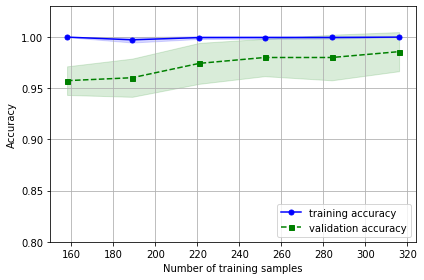

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1, solver='lbfgs', max_iter=5000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               scoring='accuracy',
                               n_jobs=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.001, 0.01, 0.1, 1.0, 10]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

1.0
{'svc__C': 0.1, 'svc__kernel': 'linear'}
Test accuracy: 1.000


Using the Logisitic model

In [24]:
logistic_model = LogisticRegression(solver='lbfgs', multi_class='auto', tol=1e-10, max_iter = 40000, C=1)

In [25]:
scores = cross_validate(logistic_model, X, Y, cv=kfold, scoring='accuracy', return_train_score=True)
print(scores)

{'fit_time': array([0.0434382 , 0.03922844, 0.05870223, 0.03076148, 0.04817057]), 'score_time': array([0.00036788, 0.00026774, 0.00032663, 0.00047565, 0.00026655]), 'test_score': array([0.96808511, 0.96808511, 0.95744681, 0.96808511, 0.9787234 ]), 'train_score': array([0.9787234 , 0.97340426, 0.9787234 , 0.9787234 , 0.98670213])}


In [26]:
logistic_model.fit(X_train, y_train)
print(logistic_model.coef_)

[[-0.04273832 -0.07537142 -0.06275095  0.21215646 -0.44134802  0.48564266
   0.32805755  0.28524117 -0.01602864 -0.14814926  0.20821654 -0.02488496
  -0.06077198  1.05789438 -0.01245867  0.87420366 -0.22040598 -0.46215744
  -0.11009167 -0.04194952 -0.01963019  0.09094609 -0.49174445  0.40830856
  -2.74925978 -3.04297479 -1.40406261]]


In [27]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(X_train, y_train)
print("Training set score: %f" % dt.score(X_train, y_train))
print("Testing set score: %f" % dt.score(X_test, y_test))

Training set score: 1.000000
Testing set score: 1.000000


In [32]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

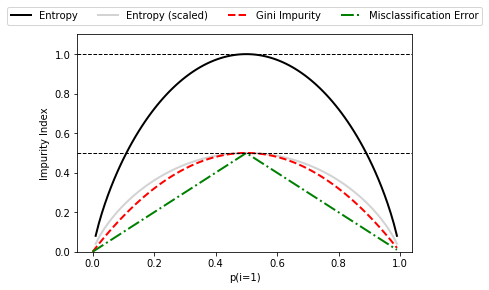

In [33]:
import matplotlib.pyplot as plt
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
#plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

1.0
{'svc__C': 0.1, 'svc__kernel': 'linear'}
